In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join

In [8]:
data_path = '../data/raw/'

# list the files in the data directory 
onlyfiles = [join(data_path,f)  for f in listdir(data_path) if isfile(join(data_path, f))]
print(onlyfiles)

['../data/raw/BTCUSD_1hr.csv', '../data/raw/data_kaggle.csv', '../data/raw/pune_1965_to_2002.csv', '../data/raw/us_presidents 2.csv']


In [9]:
df_lluvias = pd.read_csv(onlyfiles[2])

In [10]:
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias.head(3)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.00,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.00,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.32,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685


In [45]:
# matplotlib

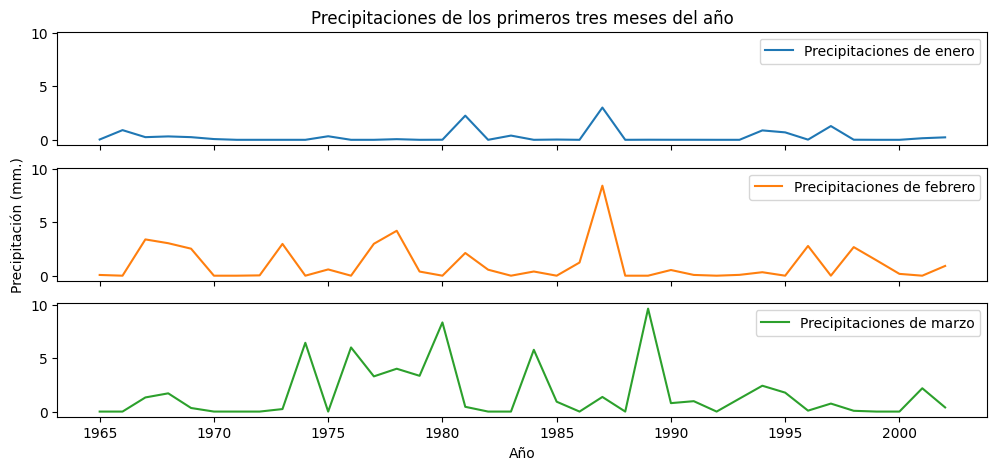

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True)  
ax[0].plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax[1].plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')
ax[2].plot(df_lluvias.index, df_lluvias['Mar'], label='Precipitaciones de marzo', color='C2')
ax[0].set_title('Precipitaciones de los primeros tres meses del año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Precipitación (mm.)')

ax[0].legend()  
ax[1].legend()
ax[2].legend()  

In [48]:
# Seaborn FacetGrid


In [16]:
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [25]:
df_lluvias_long = df_lluvias.reset_index().melt(id_vars=['Year'], value_vars=['Jan', 'Feb', 'Mar'], var_name='Mes', value_name='Precipitación')

In [32]:
df_lluvias_long

,Year,Mes,Precipitación
0,1965,Jan,0.029
1,1966,Jan,0.905
2,1967,Jan,0.248
3,1968,Jan,0.318
4,1969,Jan,0.248
...,...,...,...
109,1998,Mar,0.073
110,1999,Mar,0.000
111,2000,Mar,0.000
112,2001,Mar,2.178


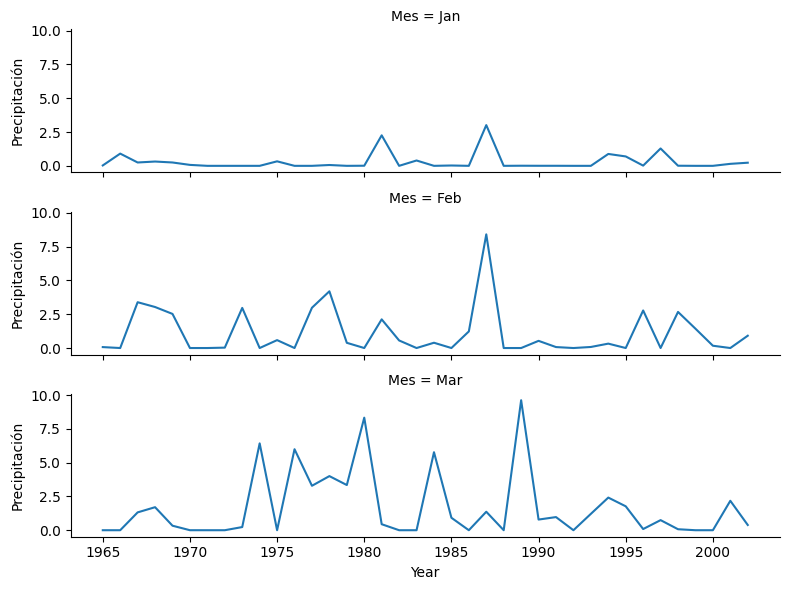

In [47]:
g = sns.FacetGrid(df_lluvias_long, row="Mes", height=2, aspect=4)
g.map(sns.lineplot, "Year", "Precipitación")
plt.show()

In [49]:
# tips
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


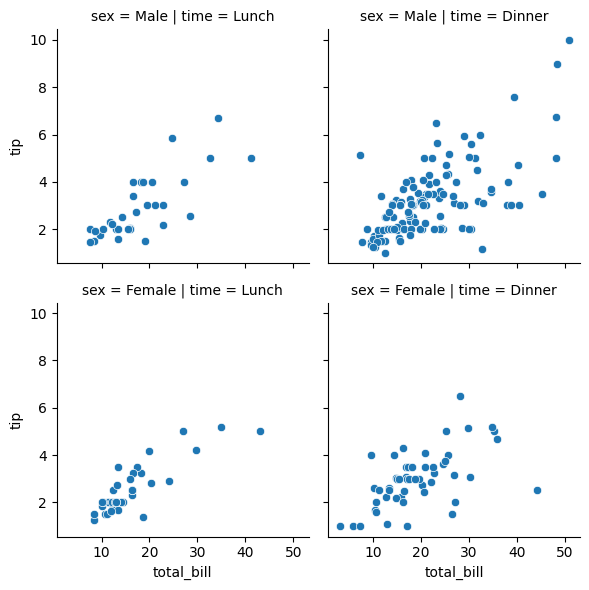

In [39]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

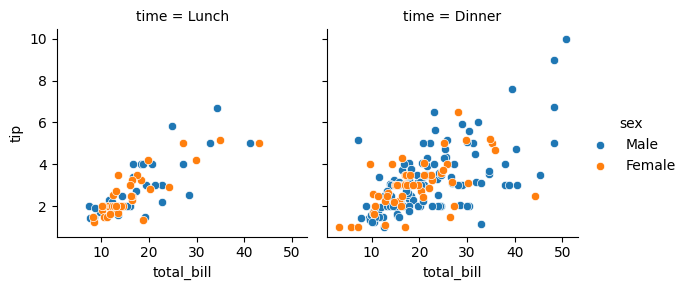

In [36]:
g = sns.FacetGrid(tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()

In [40]:
# ejemplo 

In [41]:
# Ejemplo aplicado
df_ejercicio = sns.load_dataset('exercise')
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns')
df_ejercicio.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [50]:
df_ejercicio.describe()


,id,pulse
count,90.000000,90.000000
mean,15.500000,99.700000
std,8.703932,14.858471
min,1.000000,80.000000
25%,8.000000,90.250000
50%,15.500000,96.000000
75%,23.000000,103.000000
max,30.000000,150.000000


In [42]:
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']
df_30_min.head()

,id,diet,pulse,time,kind
2,1,low fat,88,30 min,rest
5,2,low fat,93,30 min,rest
8,3,low fat,94,30 min,rest
11,4,low fat,83,30 min,rest
14,5,low fat,91,30 min,rest


<Figure size 640x480 with 0 Axes>

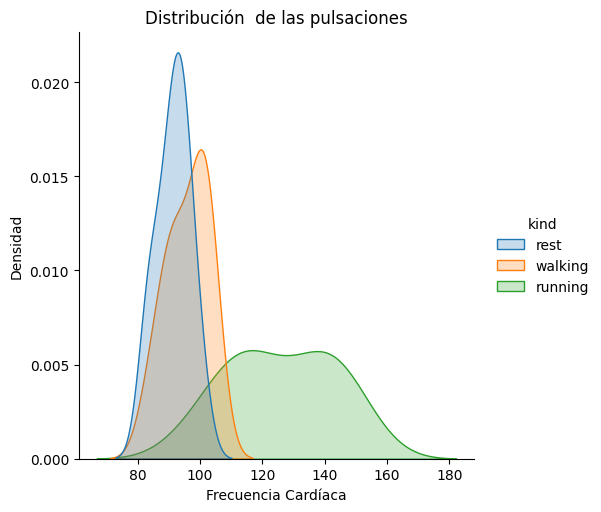

In [43]:
plt.figure()
# Figure -level
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

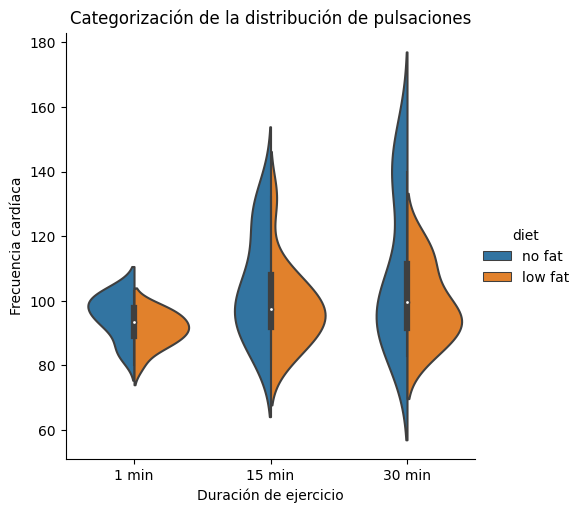

In [44]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')